In [106]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle 

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:

date_cols = [2, 19, 20, 26, 29, 30]
injuries = pd.read_csv('data/injuries_cleaned.csv', parse_dates=date_cols)


In [108]:
injuries.shape

(6540, 47)

In [109]:
bool_variables = ['surgery', 'sprain', 'broken', 'bruise', 'strain']
cat_features = ['main_body_part']
numeric_features = ['bmi', 'age_at_injury']
features = np.concat((bool_variables, cat_features, numeric_features))
features

array(['surgery', 'sprain', 'broken', 'bruise', 'strain',
       'main_body_part', 'bmi', 'age_at_injury'], dtype='<U14')

## Model Evaluations

In [110]:
injuries = injuries.sample(frac=1, random_state=123)
X = injuries[features] 
y = injuries['log_days_injured']
X_dummies = pd.get_dummies(X)

In [111]:
def evaluate_model(model, X, y, name):
    score = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
    print(name + ':', score)
    


In [112]:
linear_model = LinearRegression()

tree_model_1 = RandomForestRegressor(n_estimators=200, max_depth=10)
tree_model_2 = RandomForestRegressor(n_estimators=200, max_depth=5)
tree_model_3 = RandomForestRegressor(n_estimators=100, max_depth=5)

boosting_model_1 = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.05)
boosting_model_2 = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
boosting_model_3 = GradientBoostingRegressor(n_estimators=200, max_depth=10, learning_rate=0.05)
boosting_model_4 = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.01)
boosting_model_5 = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.01)

evaluate_model(linear_model, X_dummies, y, 'Linear Model')


Linear Model: 1.2667829705621316


In [113]:
evaluate_model(linear_model, X_dummies, y, 'Linear Model')

evaluate_model(tree_model_1, X_dummies, y, 'Tree Model 1')
evaluate_model(tree_model_2, X_dummies, y, 'Tree Model 2')
evaluate_model(tree_model_3, X_dummies, y, 'Tree Model 3')

evaluate_model(boosting_model_1, X_dummies, y, 'Boosting Model 1')
evaluate_model(boosting_model_2, X_dummies, y, 'Boosting Model 2')
evaluate_model(boosting_model_3, X_dummies, y, 'Boosting Model 3')
evaluate_model(boosting_model_4, X_dummies, y, 'Boosting Model 4')
evaluate_model(boosting_model_5, X_dummies, y, 'Boosting Model 5')

Linear Model: 1.2667829705621316
Tree Model 1: 1.2721724273540829
Tree Model 2: 1.2724542852463891
Tree Model 3: 1.2732760982263955
Boosting Model 1: 1.2748850555936695
Boosting Model 2: 1.2717424135979827
Boosting Model 3: 1.321494903131199
Boosting Model 4: 1.2816534697761548
Boosting Model 5: 1.3109107669060518


## What Features are Imortant to Models

### Linear Regression 

In [114]:
linear_model = LinearRegression()
linear_model.fit(X_dummies, y)

LinearRegression()

In [115]:
coef = linear_model.coef_
coefs_df = pd.DataFrame({'feature': X_dummies.columns, 'coef': abs(coef), 'is_pos': coef > 0})
coefs_df

,feature,coef,is_pos
0,surgery,2.118197,True
1,sprain,0.034125,False
2,broken,0.926533,True
3,bruise,0.549836,False
4,strain,0.105896,True
5,bmi,12.374371,False
6,age_at_injury,0.024870,False
7,main_body_part_abdomen,0.932128,True
8,main_body_part_ankle,0.146726,False
9,main_body_part_arm,0.297891,False


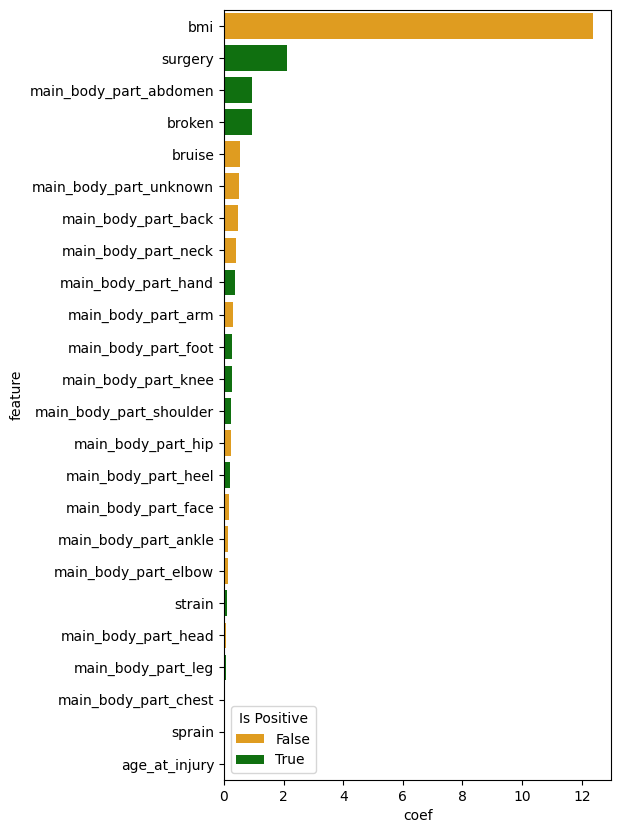

In [116]:
order = coefs_df.sort_values(by='coef', ascending=False)['feature']
plt.figure(figsize=(5, 10))
sns.barplot(coefs_df, x='coef', y='feature', hue='is_pos', palette=['orange', 'green'], order=order)
plt.legend(title='Is Positive')
plt.show()



### Random Forest Model

In [117]:
tree_model = RandomForestRegressor(n_estimators=200, max_depth=5)
tree_model.fit(X_dummies, y)
importances = tree_model.feature_importances_
importance_df = pd.DataFrame({'feature': X_dummies.columns, 'importance': importances})


<Axes: xlabel='importance', ylabel='feature'>

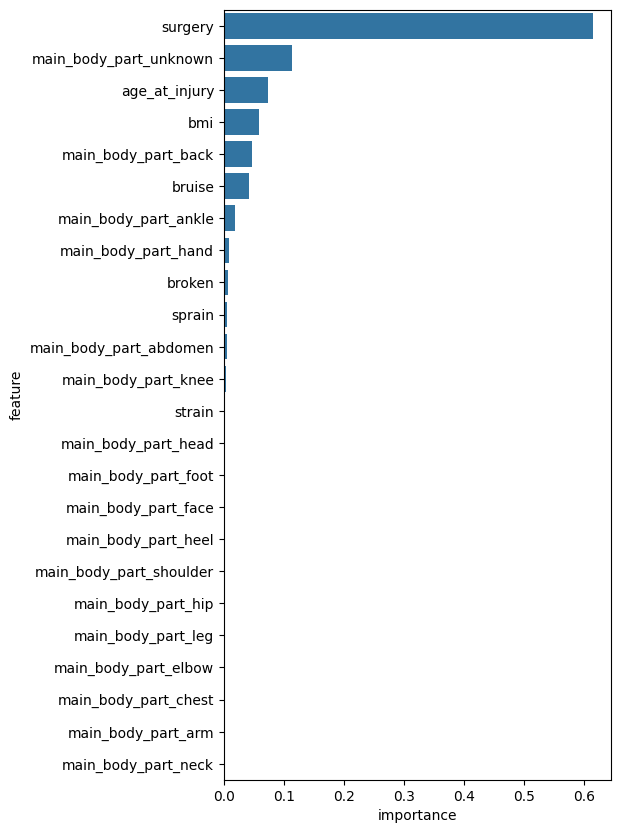

In [118]:
order = importance_df.sort_values(by='importance', ascending=False)['feature']
plt.figure(figsize=(5, 10))
sns.barplot(x=importance_df['importance'], y=importance_df['feature'], order=order)


### Gradient Boosting 

In [119]:
boosting_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)
boosting_model.fit(X_dummies, y)
importances = boosting_model.feature_importances_
importance_df = pd.DataFrame({'feature': X_dummies.columns, 'importance': importances})


<Axes: xlabel='importance', ylabel='feature'>

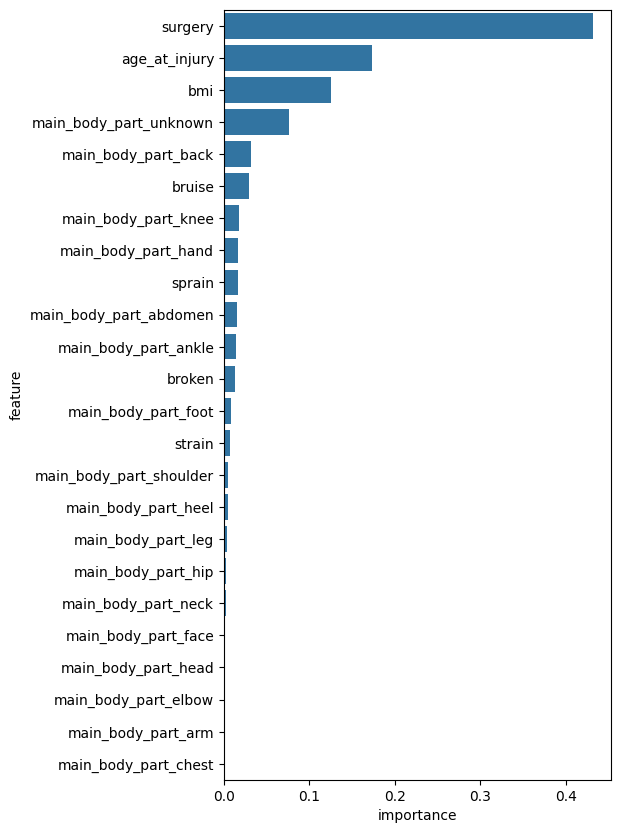

In [120]:
order = importance_df.sort_values(by='importance', ascending=False)['feature']
plt.figure(figsize=(5, 10))
sns.barplot(x=importance_df['importance'], y=importance_df['feature'], order=order)

## Save Model

The linear model was the best so we are choosing it moving forward.

In [121]:
chosen_model = linear_model
file_name = 'our_model' 
pickle.dump(chosen_model, open(file_name, 'wb'))